In [1]:
import io
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

In [2]:
data = io.StringIO("""id;x;y;sy
0;1.0;0.121159;1
1;101.0;0.195525;1
2;201.0;0.167305;1
3;301.0;0.125499;1
4;401.0;0.094138;1
5;501.0;0.071610;1
6;601.0;0.053848;1
7;701.0;0.039890;1
8;801.0;0.031099;1
9;901.0;0.023976;1
10;1001.0;0.018271;1
11;1101.0;0.013807;1
12;1201.0;0.010596;1
13;1301.0;0.008033;1
14;1401.0;0.006710;1
15;1501.0;0.005222;1
16;1601.0;0.004299;1
17;1701.0;0.003376;1
18;1801.0;0.002976;1
19;1901.0;0.002659;1
""")
df = pd.read_csv(data, sep=";", index_col="id")

In [3]:
df = df.iloc[1:,:]

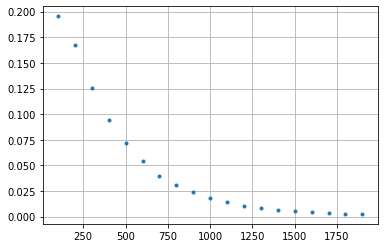

In [4]:
xl = np.linspace(0.001, 10, 201)
fig, axe = plt.subplots()
axe.plot(df.x, df.y, '.')
axe.grid()

In [5]:
x = df.x.values
y = df.y.values

In [6]:
X = x.reshape(-1, 1)

In [7]:
xl = np.linspace(0.001, 2000, 201)

In [8]:
transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)

In [9]:
polynomial = PolynomialFeatures(2)

In [10]:
regressor = TransformedTargetRegressor(regressor=LinearRegression(), transformer=transformer)

In [11]:
model = Pipeline(steps=[
    ("transformer", transformer),
    ("polynomial", polynomial),
    ("regressor", regressor)
])

In [12]:
model.fit(X, y)

Pipeline(steps=[('transformer',
                 FunctionTransformer(func=<ufunc 'log'>,
                                     inverse_func=<ufunc 'exp'>)),
                ('polynomial', PolynomialFeatures()),
                ('regressor',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'log'>,
                                                                            inverse_func=<ufunc 'exp'>)))])

In [13]:
model.score(X, y)

0.9886074889773485

In [14]:
yhat = model.predict(xl.reshape(-1, 1))

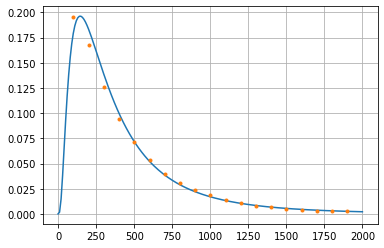

In [15]:
fig, axe = plt.subplots()
axe.plot(xl, yhat)
axe.plot(x, y, '.')
axe.grid()

In [16]:
model.steps[-1][1].regressor_.coef_

array([ 0.        ,  6.54242226, -0.6570402 ])